<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#Load-PA-County" data-toc-modified-id="Load-PA-County-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load PA County</a></span></li><li><span><a href="#Generate-random-points" data-toc-modified-id="Generate-random-points-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate random points</a></span></li><li><span><a href="#Generate-random-timestamp" data-toc-modified-id="Generate-random-timestamp-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate random timestamp</a></span></li><li><span><a href="#Join-point-and-timestamp" data-toc-modified-id="Join-point-and-timestamp-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Join point and timestamp</a></span></li><li><span><a href="#Separate-Lat/Long" data-toc-modified-id="Separate-Lat/Long-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Separate Lat/Long</a></span></li><li><span><a href="#GeoPandas-to-csv" data-toc-modified-id="GeoPandas-to-csv-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>GeoPandas to csv</a></span></li><li><span><a href="#Load-PA-rail-line" data-toc-modified-id="Load-PA-rail-line-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Load PA rail line</a></span></li></ul></div>

# Load libraries

In [1]:
%matplotlib inline

import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from geopandas import GeoSeries
from shapely.geometry import Point

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Load PA County

In [2]:
temp = gpd.read_file('../data/rawdata/PaCounty2020_07.shp')

In [3]:
temp.columns

Index(['MSLINK', 'COUNTY_NAM', 'COUNTY_NUM', 'FIPS_COUNT', 'COUNTY_ARE',
       'COUNTY_PER', 'NUMERIC_LA', 'COUNTY_N_1', 'AREA_SQ_MI', 'SOUND',
       'SPREAD_SHE', 'IMAGE_NAME', 'NOTE_FILE', 'VIDEO', 'DISTRICT_N',
       'PA_CTY_COD', 'MAINT_CTY_', 'DISTRICT_O', 'GIS_UPDATE', 'GIS_GEOMET',
       'GPID', 'AREA', 'LEN', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [4]:
temp.rename(columns={'COUNTY_NAM':'name','COUNTY_NUM':'code',
                       'FIPS_COUNT':'fips','AREA_SQ_MI':'area_sqmi'}, inplace=True)

In [5]:
temp[['fips','name','code','area_sqmi','geometry']].to_file('../data/pacounty.shp')

In [6]:
county = gpd.read_file('../data/pacounty.shp')
county.head()

,fips,name,code,area_sqmi,geometry
0,059,GREENE,30,578.256864,"POLYGON ((-80.11519 39.99029, -80.11476 39.990..."
1,061,HUNTINGDON,31,889.703256,"POLYGON ((-78.20382 40.65371, -78.20409 40.653..."
2,001,ADAMS,01,521.596725,"POLYGON ((-77.13714 40.06984, -77.13693 40.069..."
3,003,ALLEGHENY,02,744.351992,"POLYGON ((-79.69314 40.66978, -79.69265 40.668..."
4,005,ARMSTRONG,03,665.650455,"POLYGON ((-79.69314 40.66978, -79.69282 40.674..."


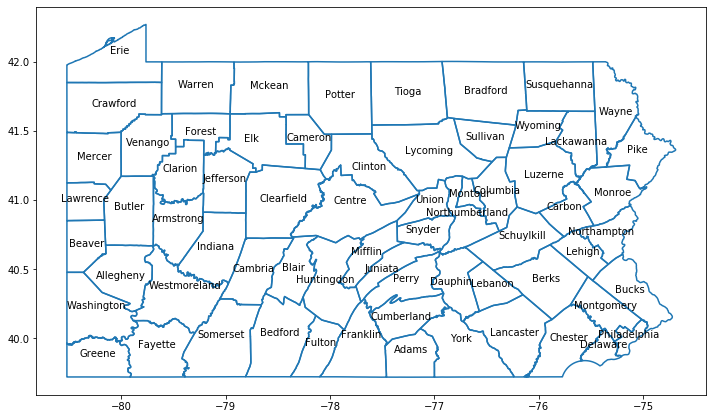

In [7]:
county['coords'] = county['geometry'].apply(lambda x: x.representative_point().coords[:])
county['coords'] = [coords[0] for coords in county['coords']]

county.boundary.plot(figsize=(12, 12))
for idx, row in county.iterrows():
    plt.annotate(s=row['name'].title(), xy=row['coords'], horizontalalignment='center')
plt.show();

# Generate random points

In [8]:
np.random.seed(123)

xmin, xmax, ymin, ymax = -80.5, -75, 39.8, 42
xc = (xmax - xmin) * np.random.random(200) + xmin
yc = (ymax - ymin) * np.random.random(200) + ymin
point = gpd.GeoDataFrame(GeoSeries([Point(x, y) for x, y in zip(xc, yc)]))
point.rename(columns={0:'geometry'}, inplace=True)

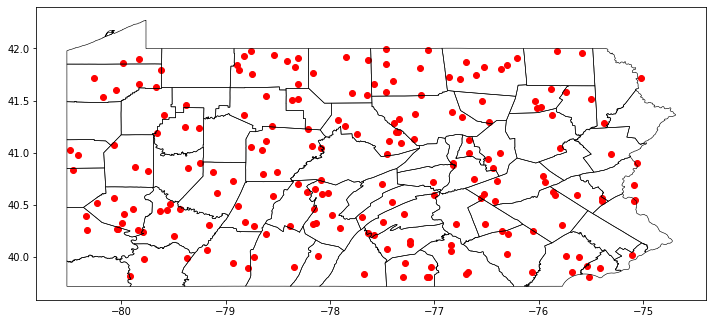

In [9]:
ax = county.boundary.plot(figsize=(12, 12), edgecolor='black', linewidth=0.6)
point.plot(ax=ax, color='r')

In [10]:
point

,geometry
0,POINT (-76.66942 40.99380)
1,POINT (-78.92623 39.94690)
2,POINT (-79.25232 41.23740)
3,POINT (-77.46777 41.99139)
4,POINT (-76.54292 41.49267)
...,...
195,POINT (-77.00255 40.59293)
196,POINT (-80.32291 40.26344)
197,POINT (-76.40371 40.72664)
198,POINT (-77.89898 40.27968)


# Generate random timestamp

In [11]:
def random_time(start, end, n, unit='D', seed=None):
    if not seed:
        np.random.seed(0)

    ndays = (end - start).days + 1
    return pd.to_timedelta(np.random.rand(n) * ndays, unit=unit) + start

In [12]:
np.random.seed(123)
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2020-08-01')
timestamp = random_time(start, end, 200)

In [13]:
timestamp = pd.DataFrame(timestamp)

In [14]:
timestamp.rename(columns={0:'timestamp'}, inplace=True)

timestamp['pid'] = 'P1'
timestamp.loc[0:99, 'pid'] = 'P2'

In [15]:
timestamp

,timestamp,pid
0,2020-04-27 10:42:22.162176000,P2
1,2020-06-02 01:12:45.308505600,P2
2,2020-05-08 23:47:33.718185600,P2
3,2020-04-26 14:31:12.100310400,P2
4,2020-03-31 15:53:27.777897600,P2
...,...,...
195,2020-04-14 22:59:47.187801600,P1
196,2020-02-18 16:00:05.505350400,P1
197,2020-02-24 10:22:29.605353600,P1
198,2020-01-13 10:02:15.962697600,P1


# Join point and timestamp

In [16]:
df = pd.concat([timestamp, point], axis=1)
type(df)

pandas.core.frame.DataFrame

In [17]:
gdf = gpd.GeoDataFrame(df, geometry=df.geometry)
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [18]:
gdf

,timestamp,pid,geometry
0,2020-04-27 10:42:22.162176000,P2,POINT (-76.66942 40.99380)
1,2020-06-02 01:12:45.308505600,P2,POINT (-78.92623 39.94690)
2,2020-05-08 23:47:33.718185600,P2,POINT (-79.25232 41.23740)
3,2020-04-26 14:31:12.100310400,P2,POINT (-77.46777 41.99139)
4,2020-03-31 15:53:27.777897600,P2,POINT (-76.54292 41.49267)
...,...,...,...
195,2020-04-14 22:59:47.187801600,P1,POINT (-77.00255 40.59293)
196,2020-02-18 16:00:05.505350400,P1,POINT (-80.32291 40.26344)
197,2020-02-24 10:22:29.605353600,P1,POINT (-76.40371 40.72664)
198,2020-01-13 10:02:15.962697600,P1,POINT (-77.89898 40.27968)


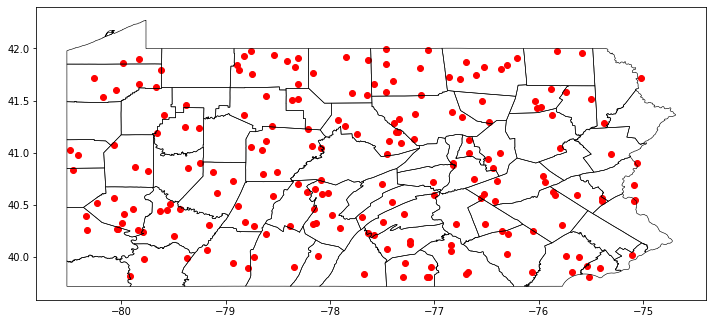

In [19]:
ax = county.boundary.plot(figsize=(12, 12), edgecolor='black', linewidth=0.6)
gdf.plot(ax=ax, color='r')

# Separate Lat/Long

In [20]:
gdf['longitude'] = gdf['geometry'].x
gdf['latitude'] = gdf['geometry'].y

In [21]:
gdf

,timestamp,pid,geometry,longitude,latitude
0,2020-04-27 10:42:22.162176000,P2,POINT (-76.66942 40.99380),-76.669419,40.993799
1,2020-06-02 01:12:45.308505600,P2,POINT (-78.92623 39.94690),-78.926234,39.946904
2,2020-05-08 23:47:33.718185600,P2,POINT (-79.25232 41.23740),-79.252317,41.237403
3,2020-04-26 14:31:12.100310400,P2,POINT (-77.46777 41.99139),-77.467769,41.991390
4,2020-03-31 15:53:27.777897600,P2,POINT (-76.54292 41.49267),-76.542921,41.492674
...,...,...,...,...,...
195,2020-04-14 22:59:47.187801600,P1,POINT (-77.00255 40.59293),-77.002548,40.592932
196,2020-02-18 16:00:05.505350400,P1,POINT (-80.32291 40.26344),-80.322911,40.263436
197,2020-02-24 10:22:29.605353600,P1,POINT (-76.40371 40.72664),-76.403706,40.726640
198,2020-01-13 10:02:15.962697600,P1,POINT (-77.89898 40.27968),-77.898978,40.279678


# GeoPandas to csv

In [22]:
gdf[['pid','timestamp','latitude','longitude']].to_csv('../data/example.csv', index=False)
gdf.loc[gdf['pid']=='P1',['pid','timestamp','latitude','longitude']].to_csv('../data/example_p1.csv', index=False)
gdf.loc[gdf['pid']=='P2',['pid','timestamp','latitude','longitude']].to_csv('../data/example_p2.csv', index=False)

# Load PA rail line

In [23]:
rail = gpd.read_file('../data/rawdata/PaRailLines2018_07.shp')

In [24]:
rail.rename(columns={'LINENAME':'line'}, inplace=True)
rail[['line','geometry']].to_file('../data/parail.shp')